In [15]:
def load_data_by_dimension(dimension):
    root="./datasets/"
    data_filename = root+f'kryptonite-{dimension}-X.npy'
    labels_filename = root+f'kryptonite-{dimension}-y.npy'

    try:
        data = np.load(data_filename)
        labels = np.load(labels_filename)
        print(f"Loaded dataset with dimension {dimension}. Data shape: {data.shape}, Labels shape: {labels.shape}")
        return data, labels
    except FileNotFoundError:
        print(f"Dataset for dimension {dimension} not found.")
        return None, None

##KNN Model Performance

Loaded dataset with dimension 9. Data shape: (18000, 9), Labels shape: (18000,)
Best k for dimension 9: 9 with accuracy 0.9584722222222222
Loaded dataset with dimension 12. Data shape: (24000, 12), Labels shape: (24000,)
Best k for dimension 12: 1 with accuracy 0.9111979166666666
Loaded dataset with dimension 15. Data shape: (30000, 15), Labels shape: (30000,)
Best k for dimension 15: 1 with accuracy 0.5041666666666667
Loaded dataset with dimension 18. Data shape: (36000, 18), Labels shape: (36000,)
Best k for dimension 18: 29 with accuracy 0.5289583333333333
Loaded dataset with dimension 24. Data shape: (48000, 24), Labels shape: (48000,)
Best k for dimension 24: 3 with accuracy 0.5035416666666667
Loaded dataset with dimension 30. Data shape: (60000, 30), Labels shape: (60000,)
Best k for dimension 30: 7 with accuracy 0.5064583333333333
Loaded dataset with dimension 45. Data shape: (90000, 45), Labels shape: (90000,)
Best k for dimension 45: 3 with accuracy 0.5050416666666666


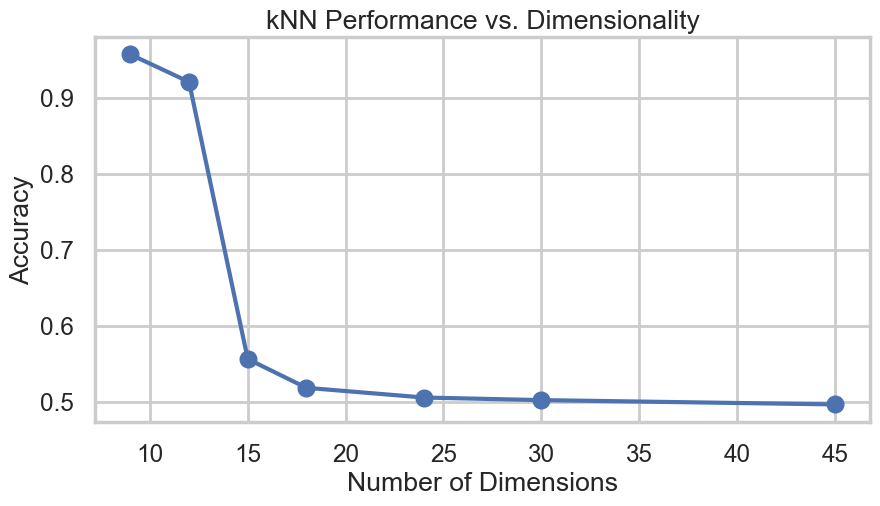

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

def find_best_knn_params(data, labels):
    # Define the parameter grid for k in kNN
    param_grid = {'n_neighbors': np.arange(1,30,2)}
    # Initialize the KNeighborsClassifier
    knn = KNeighborsClassifier()
    # Use GridSearchCV to find the best parameter
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    grid_search.fit(data, labels)
    return grid_search.best_params_['n_neighbors'], grid_search.best_score_




dimensions = [9,12,15,18,24,30,45]
best_ks = []
accuracies = []

for dim in dimensions:
    data, labels = load_data_by_dimension(dim)
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

    # find best k
    best_k, best_acc = find_best_knn_params(X_train, y_train)
    print(f"Best k for dimension {dim}: {best_k} with accuracy {best_acc}")
    best_ks.append(best_k)

    # evaluate
    model = KNeighborsClassifier(n_neighbors=best_k)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)



# Plot the performance of models with their best k
plt.figure(figsize=(10, 5))
plt.plot(dimensions, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Dimensions')
plt.ylabel('Accuracy')
plt.title('kNN Performance vs. Dimensionality')
plt.grid(True)
plt.show()


##Feature Analysis

Loaded dataset with dimension 9. Data shape: (18000, 9), Labels shape: (18000,)
Loaded dataset with dimension 9. Data shape: (18000, 9), Labels shape: (18000,)
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Feature_7  Feature_8  Feature_9  Label
0      0.952      0.363      0.975      0.685      0.836      0.772      0.705      0.038      0.749      1
1      0.971      0.830      0.961      0.310      0.783      0.172      0.170      0.025      0.256      0
2      0.022      0.292      0.044      0.307      0.110      0.834      0.269      0.965      0.165      1
3      0.967      0.277      0.029      0.237      0.782      0.764      0.817      0.003      0.736      0
4      0.995      0.221      0.979      0.777      0.636      0.785      0.736      0.044      0.193      0
5      0.046      0.796      0.008      0.737      0.221      0.710      0.199      0.988      0.215      1
6      0.044      0.773      0.959      0.753      0.868      0.270      0.726      

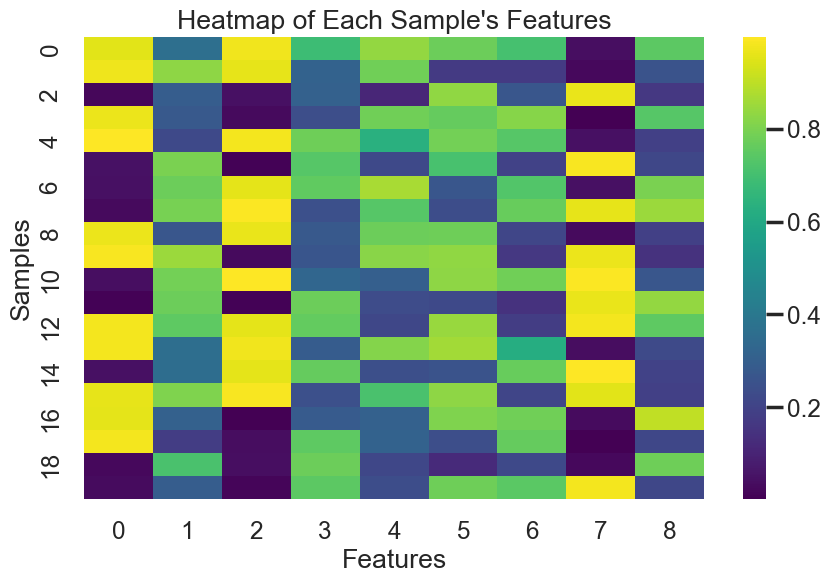

In [18]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd

data,labels=load_data_by_dimension(9)

scaler = MinMaxScaler()
data = scaler.fit_transform(data)

df = pd.DataFrame(data, columns=[f"Feature_{i+1}" for i in range(data.shape[1])])
df['Label'] = labels

pd.set_option("display.precision", 3)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

print(f"Loaded dataset with dimension {data.shape[1]}. Data shape: {data.shape}, Labels shape: {labels.shape}")

print(df.head(10))


print(df.describe().T)

plt.figure(figsize=(10, 6))
sns.heatmap(data[:20,:], cmap="viridis", cbar=True)
plt.title("Heatmap of Each Sample's Features")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.show()

Loaded dataset with dimension 9. Data shape: (18000, 9), Labels shape: (18000,)


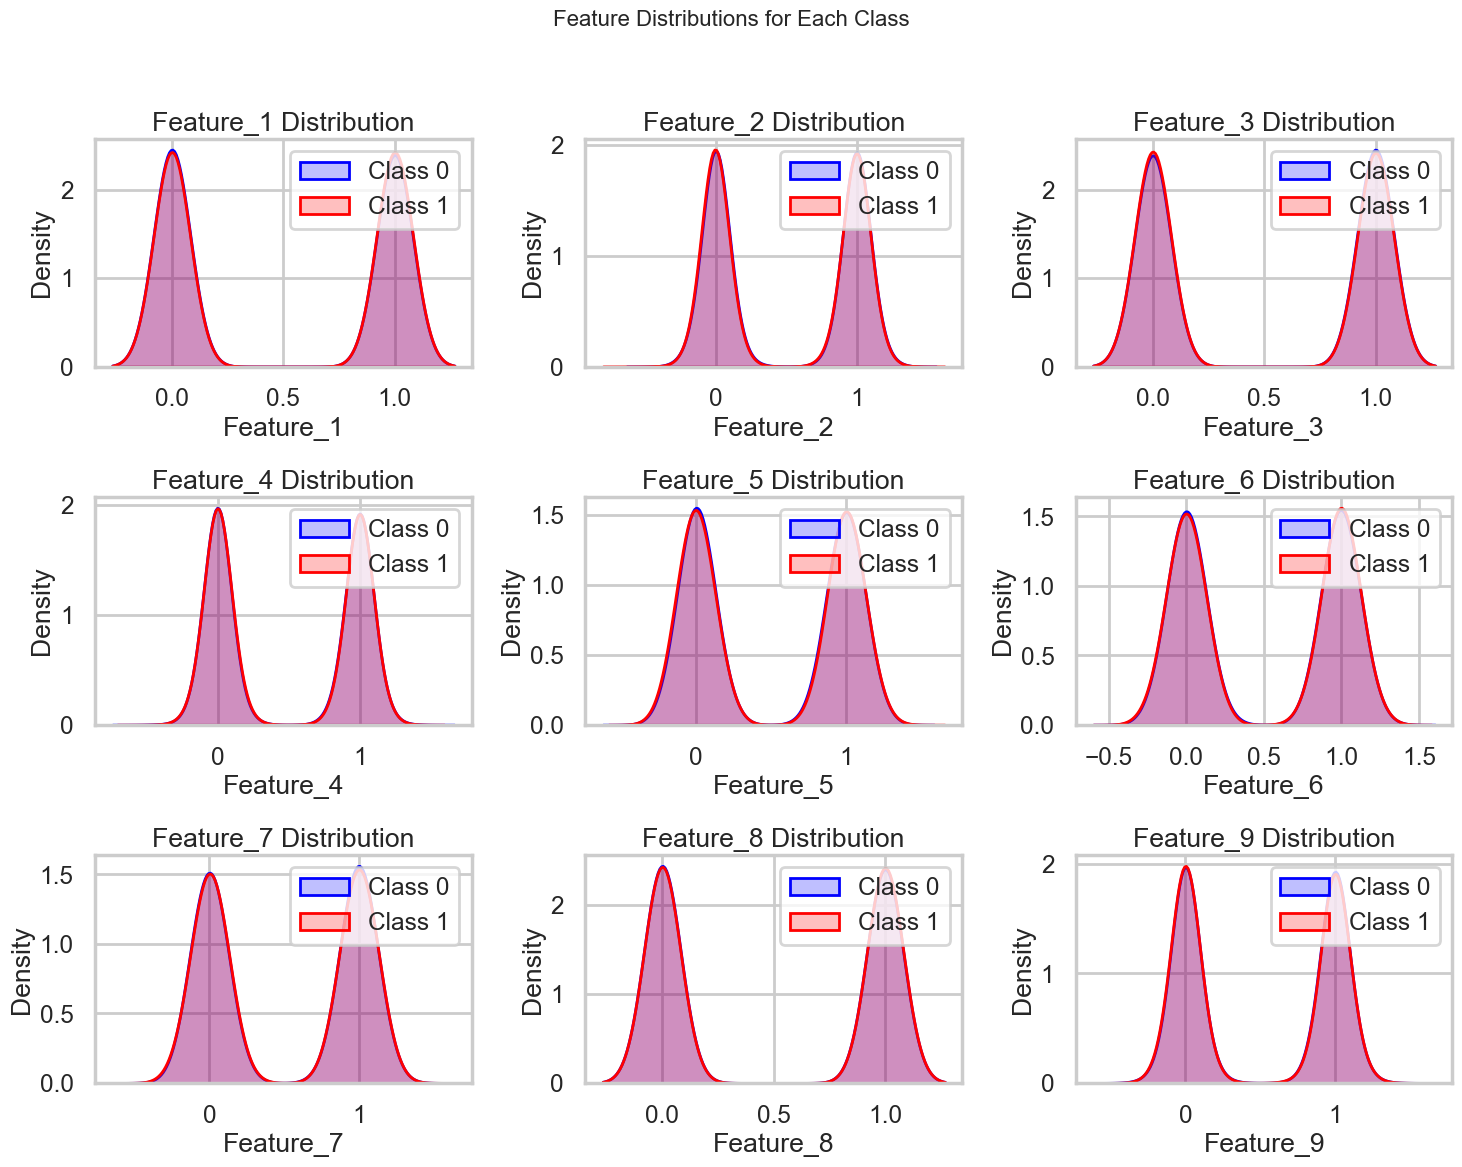

In [19]:
data,labels=load_data_by_dimension(9)

df = pd.DataFrame(data, columns=[f"Feature_{i+1}" for i in range(data.shape[1])])
df['Label'] = labels

class_0_data = df[df['Label'] == 0].drop(columns='Label')
class_1_data = df[df['Label'] == 1].drop(columns='Label')


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("Feature Distributions for Each Class", fontsize=16)
axes = axes.flatten()

for i, feature in enumerate(class_0_data.columns):
    sns.kdeplot(class_0_data[feature], label="Class 0", ax=axes[i], color='blue', fill=True)
    sns.kdeplot(class_1_data[feature], label="Class 1", ax=axes[i], color='red', fill=True)
    axes[i].set_title(f"{feature} Distribution")
    axes[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Loaded dataset with dimension 9. Data shape: (18000, 9), Labels shape: (18000,)


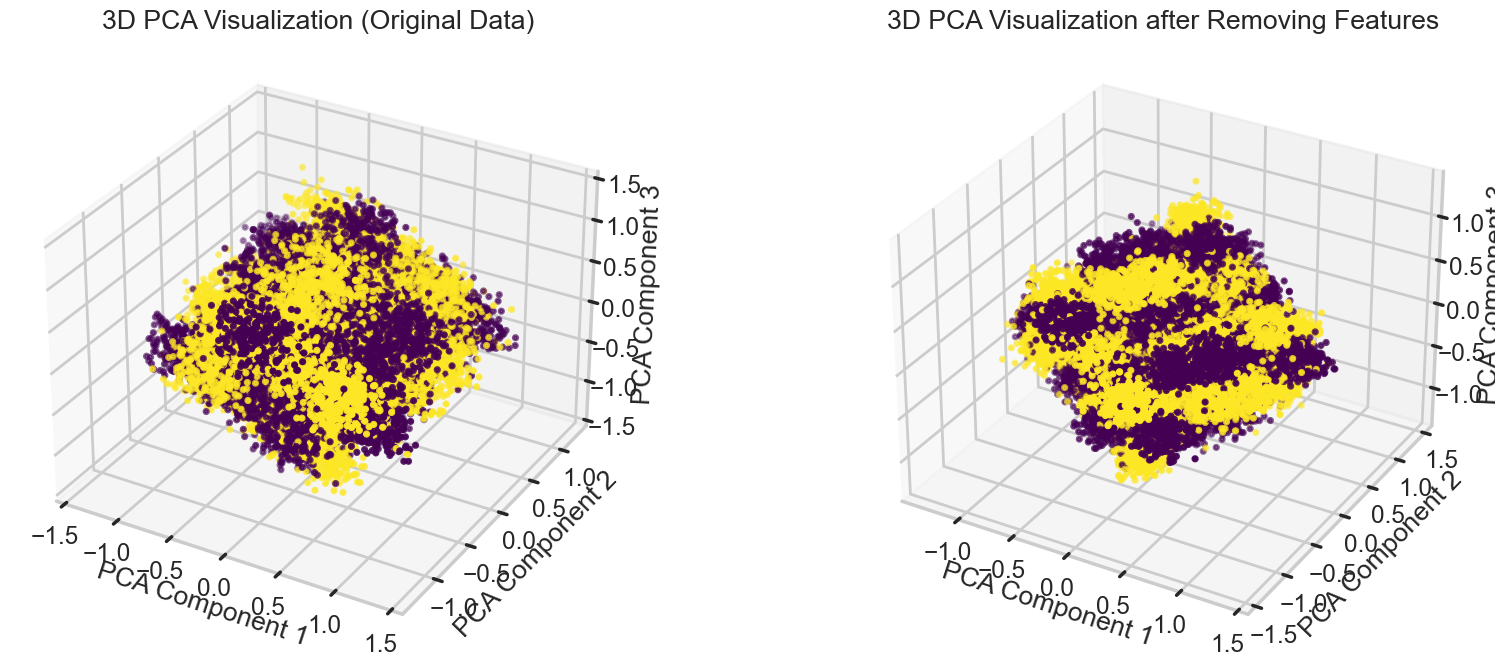

In [42]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
dim = 9
data, labels = load_data_by_dimension(dim)

# Original Data PCA
pca_orig = PCA(n_components=3)
data_pca_orig = pca_orig.fit_transform(data)

selected_features = [i for i in range(data.shape[1]) if i not in [0, 2, 7]]
data_reduced = data[:, selected_features]
pca_reduced = PCA(n_components=3)
data_pca_reduced = pca_reduced.fit_transform(data_reduced)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'projection': '3d'})

# Original Data Plot
scatter1 = ax1.scatter(data_pca_orig[:, 0], data_pca_orig[:, 1], data_pca_orig[:, 2], c=labels, cmap='viridis', s=10)
ax1.set_title('3D PCA Visualization (Original Data)')
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_zlabel('PCA Component 3')

# Reduced Data Plot
scatter2 = ax2.scatter(data_pca_reduced[:, 0], data_pca_reduced[:, 1], data_pca_reduced[:, 2], c=labels, cmap='viridis', s=10)
ax2.set_title('3D PCA Visualization after Removing Features')
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax2.set_zlabel('PCA Component 3')

# Adding legends
# legend1 = ax1.legend(*scatter1.legend_elements(), title="Labels")
# legend2 = ax2.legend(*scatter2.legend_elements(), title="Labels")

plt.show()

##Dimension Reduction

Loaded dataset with dimension 9. Data shape: (18000, 9), Labels shape: (18000,)
Best k for dimension 9: 9 with Accuracy 0.9584722222222222
Loaded dataset with dimension 12. Data shape: (24000, 12), Labels shape: (24000,)
Best k for dimension 12: 9 with Accuracy 0.9638541666666667
Loaded dataset with dimension 15. Data shape: (30000, 15), Labels shape: (30000,)
Best k for dimension 15: 7 with Accuracy 0.9681666666666666
Loaded dataset with dimension 18. Data shape: (36000, 18), Labels shape: (36000,)
Best k for dimension 18: 3 with Accuracy 0.9441666666666666
Loaded dataset with dimension 24. Data shape: (48000, 24), Labels shape: (48000,)
Best k for dimension 24: 29 with Accuracy 0.9579166666666665
Loaded dataset with dimension 30. Data shape: (60000, 30), Labels shape: (60000,)
Best k for dimension 30: 5 with Accuracy 0.8350625
Loaded dataset with dimension 45. Data shape: (90000, 45), Labels shape: (90000,)
Best k for dimension 45: 29 with Accuracy 0.7754166666666666


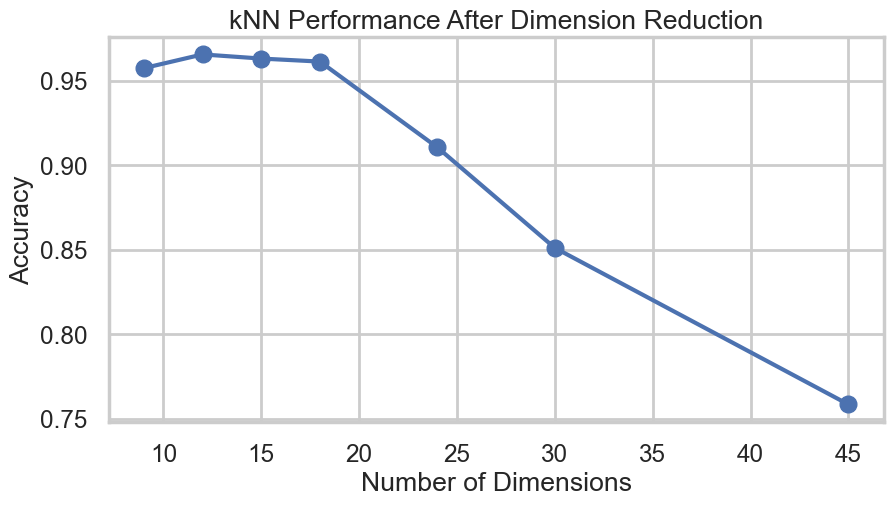

In [33]:
feature_removals = {
    9: [0, 2, 7],
    12: [3, 6, 8, 10],
    15: [0, 2, 3, 5, 7],
    18: [1, 2, 3, 7, 12, 17],
    24: [0, 3, 6, 8, 11, 15, 18, 23],
    30: [0, 6, 7, 12, 13, 14, 17, 19, 20, 24],
    45: [5, 6, 7, 9, 19, 21, 22, 23, 24, 32, 37, 38, 40, 41, 44]
}

dimensions = sorted(feature_removals.keys())
best_ks = []
accuracies = []

for dim in dimensions:
    data, labels = load_data_by_dimension(dim)
    data = np.delete(data, feature_removals[dim], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

    # find best k
    best_k, best_acc = find_best_knn_params(X_train, y_train)
    print(f"Best k for dimension {dim}: {best_k} with Accuracy {best_acc}")
    best_ks.append(best_k)

    # evaluate
    model = KNeighborsClassifier(n_neighbors=best_k)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 5))
plt.plot(dimensions, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Dimensions')
plt.ylabel('Accuracy')
plt.title('kNN Performance After Dimension Reduction')
plt.grid(True)
plt.show()


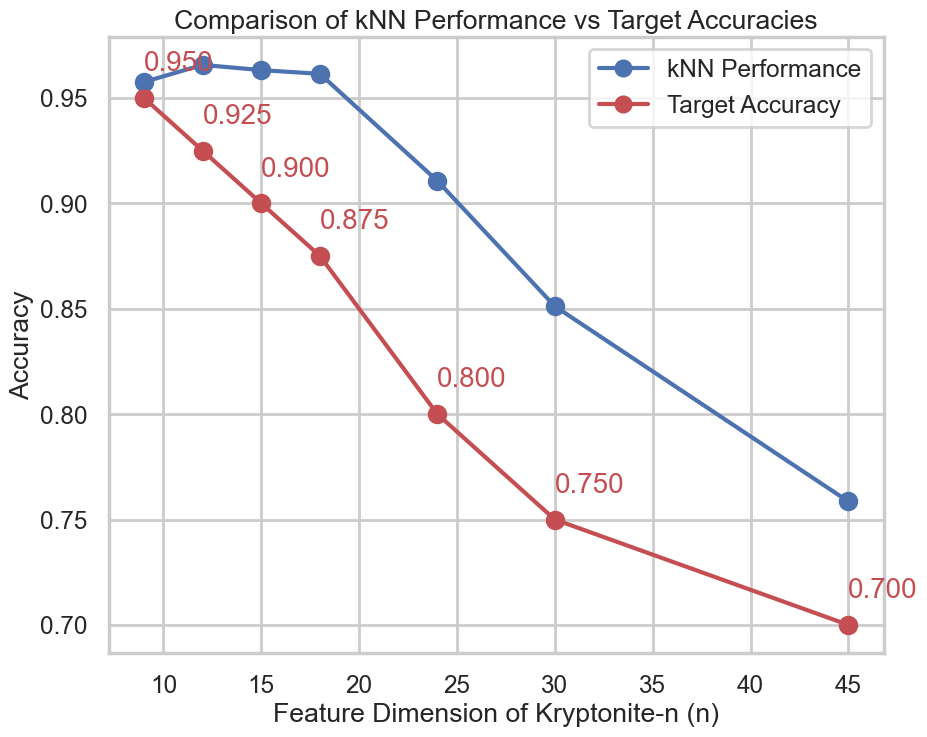

In [34]:
n = [9, 12, 15, 18, 24, 30, 45]
target_accuracies = [0.95, 0.925, 0.9, 0.875, 0.8, 0.75, 0.7]

# Plotting settings
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=0.8)
plt.figure(figsize=(10, 8))

# Plotting kNN performance
plt.plot(dimensions, accuracies, label='kNN Performance', marker='o', linestyle='-', color='b')
plt.scatter(dimensions, accuracies, color='b')

# Plotting target accuracies
plt.plot(n, target_accuracies, label='Target Accuracy', marker='o', linestyle='-', color='r')
plt.scatter(n, target_accuracies, color='r')

# Annotating target accuracies
ax = plt.gca()
for j, (x, y) in enumerate(zip(n, target_accuracies)):
    ax.text(x, y + 0.01, f'{y:.3f}', ha='left', va='bottom', color='r', size=20)

# Titles and labels
plt.title("Comparison of kNN Performance vs Target Accuracies")
plt.ylabel("Accuracy")
plt.xlabel("Feature Dimension of Kryptonite-n (n)")
plt.legend()

# Show the plot
plt.show()
